# 탐색적 데이터 분석( EDA: Exploratory Daya Analysis)

- 통찰을 얻기 위한 데이터 분석의 가장 기본이 되는 방법

## 탐색적 데이터 분석의 과정

1. 데이터 파악
    - 데이터의 외형적인 내용을 파악하는 단계
    - raw data : 분석에 활용된 적이 없는, 또는 정제되지 않은 데이터
    1. 데이터의 출처와 주제 파악
        - 데이터가 어디에서 생성된 것인지
        - 데이터가 어떻게 수집된 것인지
        - 예) 데이터의 이름, 구성 요소, 출처, 주제 등
        
    2. 데이터의 크기 파악
        - 데이터의 크기에 따라서 데이터의 처리 방식이 달라지기 때문에
        - 예) 샘플링 : 어떤 자료로부터 일부의 값을 추출하는 행위, 데이터가 너무 크거나 전체 데이터를 활용할 수 없는 경우에 수행
        
    3. 데이터의 구성 요소(피처) 파악
        - 데이터가 어떻게 구성되어 있는지, 어떤 정보를 담고 있는지를 파악하는 아주 중요한 단계
        - 예) 신체검사 데이터의 키, 몸무게, 시력, 청력 등
        
2. 데이터의 속성 탐색
    - 데이터의 실제적인 내용을 파악하는 단계
    1. 피처의 속성 탐색
        - 피처 속성 탐색 단계에서 가장 중요한 것운 **데이터에 질문을 던지는 것**
            - 예) 우리 반의 평균 키는 몇이나 될까?
        - 평균, 표준편차, 중앙값, 사분위 수 등의 통계값을 통해 피처의 정량적 속성을 정의


    2. 피처 간의 상관 관계 탐색
        - 여러 피처가 서로에게 미치는 영향을 알아보는 단계
            - 예) 학급이 비만인지 알아보려 했다고 가정하면 몸무게와 관계가 있는 피처를 파악(키)
            
    
3. 탐색한 데이터의 시각화
    - 지금까지 파악한 데이터를 효과적으로 시각화
    - 시각화는 수치적 자료만 가지고는 파악하기 힘든 패턴이나 통찰을 발견하는 데에 유용

# 멕시코풍 프렌차이즈 chipotle 주문 데이터 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
chipo = pd.read_csv("chipotle.tsv", sep = "\t")

## 데이터 파악

In [3]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [4]:
# 데이터의 행과 열 파악
chipo.shape

(4622, 5)

In [5]:
# 행과 열의 구성 정보 파악
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [7]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

- 피처의 의미
    - order_id : 주문번호
    - quantity : 아이템의 주문 수량
    - item_name : 주문한 아이템의 이름
    - choice_description : 주문한 아이템의 상세 선택 옵션
    - item_price : 주문 아이템의 가격 정보

### 피처 형태의 종류

- 수치형 피처
    - 연속형 피처
        - 어떤 구간 안의 모든 값을 데이터로써 가질 수 있음
            - 예) 키, 몸무게
            
    - 비연속형 피처
        - 셀 수 있으며, 일정 구간 안에서 정해진 몇 개의 값을 가져야 함
            - 예) 나이

- 범주형 피처
    - 순서 있는 범주형 피처
        - 순서가 있으나 수치는 아님
            - 예) 학점(A+, A0, B+, ...)
            
    - 순서 없는 범주형 피처
        - 데이터가 구분되면서도 순서가 없음
            - 예) 혈액형(A, B, O, AB)

In [8]:
chipo.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


- 간이분석 내용
    - 평균 주문 수량 약 1.08개 임
        - 대부분 한 아이템은 하나만 주문한다
        - 한 사람이 같은 메뉴를 여러 개 구매하는 경우는 많지 않다
    - order_id는 숫자의 의미를 갖지 않기 때문에 str 로 변환해야 할 수 있음
    - item_price는 수치적 특징을 파악해야하는데 object타입이기 때문에 수치형으로 변환해야함
        - 데이터 전처리 필요 

In [9]:
# 범주형 피처의 데이터 개수 파악하기
print(len(chipo["order_id"].unique()))
print(len(chipo["item_name"].unique()))

1834
50


## 데이터 속성 탐색

### 가장 많이 주문한 아이템 Top 10

In [13]:
chipo["item_name"].value_counts()[:10]
# chipotle의 가장 많이 팔린 음식들 알아보기
# [:10] 10개 자르기
# 한 주문에 여러 개를 주문했을 수도 있는 데이터

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

### 아이템별 주문 횟수와 총량

In [16]:
# 아이템별 주문 횟수
order_cnt = chipo.groupby("item_name")["order_id"].count()
print(order_cnt[:10])

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64


In [17]:
# 아이템별 주문 총량(판매량)
item_qt = chipo.groupby("item_name")["quantity"].sum()
print(item_qt[:10])

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64


#### 주문 횟수와 주문 총량이 다른 이유는 한 번 주문 때, soft drink와 water를 여러 개 주문했기 때문에 다를 수 있음

In [18]:
print(item_qt)

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


### 간이 시각화

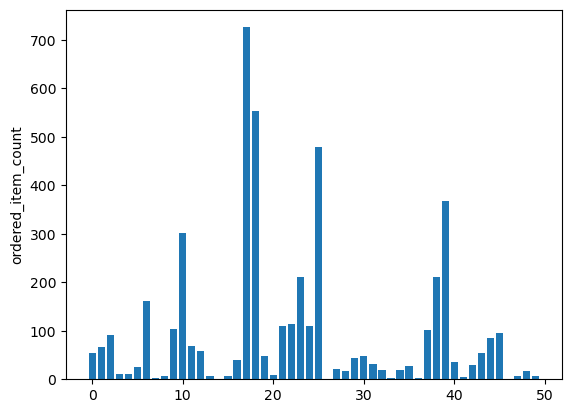

In [19]:
# item 수가 너무 많아서 시각화로 다 나타내기 힘들기 때문에 숫자로 표현
x_pos = np.arange(len(item_qt))

plt.bar(x_pos, order_cnt)
plt.ylabel("ordered_item_count")
plt.show()

### 데이터 전처리

### item_price 피처 전처리

In [20]:
chipo["item_price"].head()

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

- 원인
    - 가격을 나타내는 숫자 앞에 $ 기호가 붙어 있음
    
- 해결 방안
    - map과 lamda를 통해  float형으로 변환
    - map
        - 시리즈의 각 값에 함수를 적용할 수 있는 기능
    - lamda 표현식(lamda expression)
        - 임시로 사용할 익명 함수(anonymous function)를 간편하게 표현하는 방식

In [50]:
chipo["item_price"].map(lambda x: float(x[1:]))
# 1번째 부터 뽑아낸다 (달러 제거)
# 일시적으로 달러를 제거

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [51]:
chipo.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [52]:
chipo.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


## 깊이 있는 데이터 탐색

### 주문당 평균 계산 금액

In [33]:
chipo.groupby("order_id")["item_price"].sum().mean()

TypeError: Could not convert $2.39 $3.39 $3.39 $2.39 $16.98 $10.98 $1.69 $11.75 $9.25 $9.25 $4.45 $8.75 $8.75 $11.25 $4.45 $2.39 $8.49 $8.49 $2.18 $8.75 $4.45 $8.99 $3.39 $10.98 $3.39 $2.39 $8.49 $8.99 $1.09 $8.49 $2.39 $8.99 $1.69 $8.99 $1.09 $8.75 $8.75 $4.45 $2.95 $11.75 $2.15 $4.45 $11.25 $11.75 $8.75 $10.98 $8.99 $3.39 $8.99 $3.99 $8.99 $2.18 $10.98 $1.09 $8.99 $2.39 $9.25 $11.25 $11.75 $2.15 $4.45 $9.25 $11.25 $8.75 $8.99 $8.99 $3.39 $8.99 $10.98 $8.99 $1.69 $8.99 $3.99 $8.75 $4.45 $8.75 $8.75 $2.15 $8.75 $11.25 $2.15 $9.25 $8.75 $8.75 $9.25 $8.49 $8.99 $1.09 $9.25 $2.95 $11.75 $11.75 $9.25 $11.75 $4.45 $9.25 $4.45 $11.75 $8.75 $8.75 $4.45 $8.99 $8.99 $3.99 $8.49 $3.39 $8.99 $1.09 $9.25 $4.45 $8.75 $2.95 $4.45 $2.39 $8.49 $8.99 $8.49 $1.09 $8.99 $3.99 $8.75 $9.25 $4.45 $11.25 $4.45 $8.99 $1.09 $9.25 $2.95 $4.45 $11.75 $4.45 $8.49 $2.39 $10.98 $22.50 $11.75 $4.45 $11.25 $4.45 $11.25 $4.45 $11.25 $11.25 $11.75 $9.25 $4.45 $11.48 $17.98 $1.69 $17.50 $4.45 $8.49 $2.39 $17.50 $4.45 $4.45 $11.25 $11.75 $10.98 $8.49 $10.98 $2.18 $11.48 $8.49 $2.39 $4.45 $11.25 $11.75 $8.75 $8.49 $2.18 $8.49 $3.39 $8.49 $8.99 $10.98 $11.48 $8.49 $1.09 $1.09 $9.25 $8.75 $2.95 $9.25 $4.45 $11.25 $11.48 $8.49 $8.49 $8.99 $2.39 $11.25 $8.75 $2.95 $1.09 $8.99 $8.49 $2.39 $10.98 $1.09 $3.99 $11.25 $8.75 $8.49 $3.39 $8.75 $9.25 $2.15 $11.25 $11.25 $11.25 $4.45 $22.50 $4.45 $11.75 $8.75 $17.50 $8.75 $9.25 $8.75 $2.15 $9.25 $4.30 $8.75 $11.25 $2.15 $8.99 $1.09 $8.99 $3.99 $8.75 $2.95 $2.95 $11.75 $5.90 $9.25 $9.25 $11.75 $9.25 $2.95 $17.50 $8.75 $9.25 $10.98 $8.99 $1.09 $1.09 $1.09 $8.99 $10.98 $1.09 $8.75 $8.75 $9.25 $9.25 $8.75 $8.75 $8.99 $8.99 $8.99 $1.09 $11.75 $1.25 $8.99 $2.39 $9.25 $2.95 $8.99 $3.99 $8.49 $2.39 $8.49 $8.49 $8.49 $1.69 $8.49 $3.99 $8.99 $1.69 $1.09 $23.78 $17.50 $2.15 $8.75 $9.25 $9.25 $8.75 $4.45 $8.75 $11.25 $11.25 $1.25 $9.25 $4.45 $11.25 $11.75 $11.75 $6.49 $8.99 $2.39 $8.49 $2.39 $11.25 $8.75 $2.15 $8.99 $1.69 $8.75 $11.25 $2.15 $4.45 $8.75 $8.49 $8.99 $17.50 $8.49 $1.09 $1.09 $8.75 $1.25 $2.15 $11.08 $8.49 $8.49 $8.99 $2.39 $8.75 $2.15 $1.50 $11.25 $2.15 $8.49 $8.49 $11.75 $9.25 $11.75 $1.25 $11.25 $8.75 $4.45 $6.49 $9.25 $2.95 $11.25 $4.45 $1.25 $1.25 $8.49 $2.39 $2.18 $8.49 $2.18 $22.16 $17.50 $8.75 $2.95 $6.49 $8.99 $3.39 $3.39 $8.99 $8.49 $11.25 $2.15 $11.25 $2.95 $11.25 $1.25 $8.99 $1.09 $8.75 $8.75 $9.25 $2.95 $11.75 $1.50 $8.99 $1.09 $11.25 $1.25 $1.25 $11.25 $11.75 $2.15 $8.99 $1.69 $11.75 $6.49 $8.75 $9.25 $11.25 $4.45 $1.25 $11.25 $4.45 $8.49 $8.99 $8.49 $8.99 $11.25 $1.25 $11.75 $1.25 $11.75 $9.25 $4.45 $11.25 $2.15 $32.94 $1.25 $11.25 $11.48 $1.69 $1.09 $17.50 $4.45 $6.49 $9.25 $8.75 $9.25 $9.25 $8.75 $8.75 $2.15 $2.95 $17.50 $10.98 $11.48 $11.48 $3.39 $8.99 $1.69 $8.99 $1.09 $10.98 $3.39 $8.99 $1.09 $9.25 $8.75 $11.25 $4.45 $2.95 $9.25 $22.20 $8.49 $8.99 $8.75 $8.75 $11.75 $8.75 $11.25 $9.25 $11.25 $11.25 $8.75 $11.25 $2.95 $1.25 $8.49 $1.69 $11.75 $11.25 $8.75 $8.75 $4.45 $8.49 $3.99 $8.49 $3.99 $11.48 $1.69 $1.09 $11.25 $1.50 $10.58 $1.69 $9.25 $11.25 $8.75 $9.25 $11.25 $11.25 $8.75 $11.75 $8.75 $8.75 $8.75 $2.15 $11.25 $11.75 $2.50 $4.45 $9.25 $4.45 $11.25 $8.49 $3.99 $9.25 $9.25 $11.25 $9.25 $11.75 $11.25 $1.25 $23.50 $1.25 $8.99 $8.49 $7.40 $7.40 $8.75 $1.25 $4.45 $8.75 $2.15 $8.75 $4.45 $7.40 $7.40 $7.40 $8.99 $3.99 $8.99 $1.69 $8.75 $8.75 $8.75 $8.75 $11.25 $11.25 $2.95 $8.75 $18.50 $8.49 $3.99 $2.95 $9.25 $9.25 $3.00 $1.25 $8.75 $9.25 $4.45 $8.75 $11.25 $4.45 $10.98 $22.16 $4.45 $8.75 $9.25 $6.49 $9.25 $11.25 $8.75 $9.25 $2.15 $9.25 $4.45 $9.25 $2.95 $9.25 $8.75 $9.25 $1.25 $1.25 $8.75 $8.75 $9.25 $4.45 $11.75 $11.75 $11.75 $9.25 $9.25 $16.98 $2.39 $3.39 $3.39 $9.25 $11.75 $11.25 $2.15 $8.75 $9.25 $4.45 $10.98 $11.25 $9.25 $22.50 $9.25 $2.95 $1.50 $11.48 $8.49 $1.69 $8.49 $8.49 $8.49 $6.78 $11.75 $4.45 $8.75 $4.45 $11.89 $9.39 $8.75 $2.95 $1.25 $9.25 $8.75 $23.78 $8.75 $9.25 $2.15 $2.15 $1.25 $8.49 $3.99 $10.98 $1.09 $8.75 $4.45 $8.75 $11.75 $2.95 $4.45 $9.25 $8.75 $8.49 $3.99 $22.50 $11.25 $1.25 $8.75 $8.75 $18.50 $6.49 $8.75 $8.75 $4.45 $8.49 $3.99 $8.99 $1.09 $8.49 $2.39 $11.48 $1.69 $2.50 $9.25 $1.50 $17.50 $2.95 $8.75 $4.45 $11.75 $8.75 $8.49 $1.69 $8.49 $3.99 $8.99 $8.99 $3.99 $8.99 $11.25 $4.45 $1.25 $3.99 $10.98 $7.40 $3.00 $7.40 $4.00 $8.49 $3.99 $9.25 $4.45 $11.25 $1.25 $11.75 $1.25 $11.25 $2.15 $11.25 $4.45 $3.75 $11.75 $8.99 $2.39 $8.75 $4.45 $1.25 $8.99 $8.49 $2.18 $8.49 $2.18 $1.09 $8.75 $2.95 $1.25 $1.50 $11.25 $9.25 $2.95 $1.25 $8.49 $3.99 $11.48 $3.99 $8.49 $11.25 $1.25 $8.99 $1.69 $11.25 $1.25 $6.49 $8.75 $9.25 $8.75 $2.95 $8.75 $11.75 $8.69 $8.69 $2.29 $3.99 $8.49 $8.75 $8.75 $1.25 $11.75 $11.25 $11.25 $11.25 $1.25 $9.25 $11.75 $6.49 $3.99 $8.49 $11.25 $2.15 $11.25 $11.89 $8.99 $1.69 $8.99 $8.99 $3.99 $8.99 $9.25 $9.25 $2.15 $7.40 $7.40 $8.75 $8.75 $9.25 $4.45 $11.25 $1.25 $11.75 $11.25 $1.25 $3.99 $8.49 $8.49 $8.49 $8.99 $8.75 $2.15 $1.25 $8.49 $1.09 $1.09 $8.75 $2.95 $1.25 $9.25 $1.25 $2.15 $11.25 $1.25 $4.45 $8.75 $2.50 $8.90 $8.75 $8.75 $8.75 $11.25 $11.25 $10.98 $3.99 $10.98 $3.99 $1.69 $8.99 $9.25 $8.75 $8.99 $1.09 $9.25 $2.95 $8.75 $9.25 $3.99 $8.49 $8.75 $8.75 $22.50 $10.98 $3.27 $3.99 $8.99 $1.09 $11.08 $8.75 $4.45 $11.08 $3.99 $8.49 $4.30 $9.25 $8.75 $11.25 $11.25 $9.25 $8.49 $8.99 $8.49 $8.75 $2.95 $4.45 $9.25 $2.95 $9.25 $8.75 $11.25 $4.45 $16.98 $8.49 $2.39 $11.25 $3.75 $9.25 $4.45 $9.25 $9.25 $4.45 $8.75 $9.25 $8.75 $9.25 $9.25 $9.25 $11.48 $8.99 $22.50 $11.75 $11.25 $1.25 $8.75 $2.15 $1.25 $11.25 $8.75 $1.25 $11.25 $1.50 $11.25 $11.25 $9.25 $6.49 $8.90 $8.75 $4.45 $11.25 $1.25 $17.50 $9.25 $8.75 $11.75 $3.00 $8.49 $8.49 $10.98 $8.99 $3.99 $8.75 $4.45 $8.99 $1.69 $11.75 $8.75 $11.25 $4.45 $11.75 $1.25 $11.75 $2.95 $8.99 $8.99 $2.18 $17.98 $8.99 $8.49 $1.69 $11.75 $11.25 $2.95 $3.75 $9.25 $11.75 $8.75 $2.15 $1.50 $8.49 $8.49 $3.39 $8.69 $3.89 $8.75 $4.45 $8.75 $11.25 $2.15 $8.75 $8.49 $1.69 $8.49 $8.49 $1.25 $8.75 $11.75 $11.75 $8.99 $1.09 $8.75 $4.45 $8.75 $2.95 $8.75 $2.15 $3.99 $8.49 $8.99 $3.99 $8.49 $1.69 $1.09 $8.99 $1.09 $9.25 $8.75 $8.99 $2.39 $1.25 $1.25 $11.25 $11.25 $9.25 $9.25 $11.25 $1.50 $3.99 $8.49 $11.25 $9.25 $11.25 $17.50 $8.75 $8.90 $8.75 $8.75 $8.99 $2.39 $11.25 $9.25 $2.15 $11.25 $1.25 $11.75 $1.25 $11.25 $11.75 $1.25 $11.25 $11.25 $8.49 $10.98 $8.75 $1.25 $8.75 $8.49 $8.49 $1.50 $1.50 $8.75 $4.45 $11.25 $1.25 $11.75 $8.49 $2.39 $9.25 $4.45 $9.25 $8.75 $8.99 $1.69 $17.50 $2.39 $8.99 $8.99 $11.25 $4.45 $8.75 $4.45 $9.25 $6.49 $10.98 $8.49 $8.49 $1.09 $1.69 $9.25 $4.45 $8.75 $1.25 $2.95 $3.99 $8.49 $11.75 $11.75 $2.15 $11.48 $8.75 $2.15 $1.25 $11.25 $2.15 $1.25 $8.75 $8.75 $6.49 $1.69 $8.99 $8.75 $11.75 $10.98 $1.09 $8.49 $3.39 $8.75 $2.15 $1.25 $11.48 $10.98 $10.98 $8.49 $2.95 $9.25 $9.25 $11.75 $4.45 $11.48 $11.25 $8.75 $4.45 $1.69 $8.99 $8.75 $4.45 $1.50 $11.75 $2.15 $8.99 $2.39 $8.75 $2.95 $1.25 $8.75 $2.15 $1.25 $2.18 $2.18 $11.48 $8.75 $2.95 $11.75 $11.75 $1.25 $10.58 $8.99 $2.39 $11.75 $4.45 $11.25 $11.25 $17.50 $8.75 $8.75 $8.75 $22.50 $9.25 $8.75 $4.45 $11.75 $1.25 $11.25 $11.25 $2.95 $8.99 $1.69 $11.25 $4.45 $8.75 $6.49 $8.75 $4.45 $9.25 $4.45 $11.75 $11.75 $4.45 $11.89 $11.75 $11.25 $2.95 $1.50 $4.45 $8.75 $8.99 $1.09 $8.99 $1.09 $3.99 $11.48 $8.49 $9.25 $4.45 $11.48 $9.25 $2.95 $9.25 $8.49 $8.99 $8.99 $8.49 $8.75 $2.95 $4.45 $11.89 $10.58 $8.19 $1.69 $8.75 $2.15 $1.25 $17.50 $6.49 $9.25 $2.15 $8.75 $4.45 $8.75 $1.25 $11.48 $11.48 $8.99 $2.18 $8.49 $8.99 $2.39 $2.39 $2.18 $8.75 $4.45 $11.25 $9.25 $9.25 $11.25 $11.25 $4.45 $2.95 $11.75 $8.49 $8.49 $8.99 $1.69 $9.25 $11.25 $11.75 $9.25 $8.75 $11.75 $8.75 $8.75 $11.25 $11.25 $10.98 $11.25 $4.45 $10.98 $8.49 $8.99 $3.39 $3.99 $8.99 $1.09 $1.09 $2.39 $17.50 $4.45 $11.25 $11.25 $4.45 $9.25 $4.45 $8.75 $2.15 $1.25 $11.89 $2.95 $11.75 $1.25 $11.25 $4.45 $11.48 $11.48 $2.95 $9.25 $8.75 $9.25 $2.95 $11.25 $1.25 $11.75 $1.25 $8.99 $2.39 $1.25 $11.25 $1.25 $11.25 $8.49 $3.99 $35.00 $27.75 $8.75 $11.80 $8.90 $5.90 $6.49 $10.98 $17.98 $2.39 $9.25 $8.75 $2.15 $8.75 $4.45 $8.49 $1.69 $8.19 $8.69 $10.98 $3.99 $11.48 $11.48 $4.45 $8.75 $6.49 $8.75 $8.75 $9.25 $1.25 $4.45 $8.49 $1.69 $9.25 $4.45 $8.99 $1.09 $11.25 $2.95 $11.08 $11.08 $3.89 $10.98 $11.25 $8.75 $11.25 $9.25 $4.30 $8.75 $8.49 $3.99 $1.69 $8.99 $8.49 $1.69 $11.75 $11.25 $11.89 $9.25 $2.95 $9.25 $2.95 $8.75 $4.45 $4.45 $8.75 $10.98 $11.48 $8.49 $9.25 $4.45 $11.75 $11.89 $8.99 $8.49 $8.75 $9.25 $8.75 $8.75 $11.75 $11.75 $4.45 $11.25 $11.75 $2.50 $8.99 $1.69 $11.75 $2.15 $1.25 $9.25 $8.75 $8.90 $9.25 $2.95 $8.75 $11.25 $8.90 $11.25 $11.75 $11.48 $1.69 $3.39 $9.25 $2.95 $8.99 $1.69 $8.49 $10.98 $11.25 $2.95 $8.99 $1.69 $8.75 $2.15 $1.25 $8.75 $2.95 $9.25 $2.50 $11.25 $1.25 $11.75 $2.50 $11.25 $1.50 $8.75 $1.25 $2.95 $11.48 $11.48 $8.75 $8.75 $2.15 $11.75 $1.25 $9.25 $9.25 $6.49 $11.75 $8.49 $8.49 $1.09 $10.98 $8.75 $1.25 $2.15 $11.25 $1.50 $11.25 $11.25 $8.49 $8.49 $8.75 $1.50 $1.25 $1.50 $8.75 $2.50 $2.15 $7.40 $7.40 $4.00 $9.25 $9.39 $9.25 $9.25 $9.39 $11.25 $8.90 $11.25 $6.00 $11.25 $11.25 $11.25 $22.50 $11.48 $1.09 $8.49 $8.49 $17.50 $11.25 $1.50 $9.25 $8.75 $3.99 $8.49 $8.75 $8.75 $8.75 $8.75 $8.75 $11.75 $1.50 $11.25 $11.25 $2.95 $8.99 $10.98 $9.25 $8.75 $4.45 $8.49 $1.09 $2.39 $8.75 $8.75 $11.48 $8.99 $8.49 $8.49 $2.39 $10.98 $8.49 $3.99 $11.75 $4.45 $8.75 $2.15 $1.25 $10.98 $8.99 $11.25 $1.50 $8.75 $2.15 $1.25 $8.75 $9.25 $8.75 $11.25 $1.50 $8.75 $1.25 $4.45 $10.98 $8.75 $2.95 $1.25 $8.75 $2.95 $1.25 $8.49 $8.49 $2.39 $11.25 $1.25 $8.75 $8.75 $9.25 $8.75 $11.89 $1.25 $8.75 $2.15 $1.25 $8.99 $1.09 $8.75 $4.45 $26.25 $8.75 $4.45 $11.75 $2.95 $8.75 $8.75 $11.75 $8.75 $11.25 $11.25 $11.25 $4.45 $1.25 $8.49 $8.49 $8.49 $8.99 $8.99 $2.39 $2.39 $3.99 $8.75 $4.45 $2.15 $9.25 $1.25 $11.25 $11.75 $8.75 $4.45 $11.25 $2.15 $8.75 $4.45 $8.75 $8.75 $1.25 $11.25 $2.15 $8.75 $5.90 $11.75 $1.25 $9.25 $3.75 $8.75 $1.25 $4.45 $11.75 $4.45 $8.75 $23.50 $8.75 $2.95 $8.75 $8.75 $11.89 $4.45 $2.95 $1.25 $8.75 $4.45 $2.95 $1.25 $8.75 $2.15 $1.25 $11.75 $2.95 $8.99 $3.39 $9.25 $9.25 $17.50 $2.95 $11.89 $1.50 $11.25 $2.95 $9.25 $11.25 $11.25 $2.95 $8.75 $9.25 $4.30 $8.75 $8.75 $11.25 $8.75 $4.30 $8.75 $1.25 $2.15 $8.49 $8.49 $3.39 $3.39 $10.98 $10.98 $2.39 $11.25 $11.75 $11.75 $1.25 $5.90 $8.75 $11.25 $9.25 $4.45 $1.50 $3.39 $8.99 $2.39 $11.25 $2.15 $11.25 $11.75 $11.75 $4.45 $11.75 $4.45 $9.25 $8.75 $8.49 $8.99 $8.49 $8.99 $11.75 $8.75 $8.49 $3.99 $3.89 $11.08 $8.49 $8.99 $8.49 $8.49 $8.49 $11.25 $2.15 $17.50 $8.75 $2.95 $8.49 $8.49 $10.98 $1.09 $11.25 $2.15 $2.95 $1.25 $8.75 $9.25 $9.25 $9.25 $2.95 $8.75 $2.15 $1.25 $8.99 $3.99 $11.75 $2.15 $8.99 $3.39 $9.25 $8.75 $11.25 $11.25 $4.45 $8.75 $2.15 $1.25 $11.75 $4.45 $9.25 $2.95 $8.49 $8.49 $11.25 $8.75 $4.45 $11.25 $11.25 $11.25 $11.25 $4.45 $8.49 $1.69 $8.49 $3.39 $8.75 $11.25 $9.25 $8.75 $11.25 $11.25 $11.75 $11.25 $11.75 $11.25 $11.75 $21.96 $10.98 $1.69 $11.48 $8.99 $8.49 $1.69 $9.25 $2.15 $1.50 $11.25 $1.50 $8.75 $8.75 $2.95 $8.49 $1.69 $8.75 $2.95 $1.25 $11.25 $2.15 $11.08 $8.49 $8.49 $8.49 $11.75 $1.25 $11.75 $8.75 $8.75 $8.75 $4.45 $11.25 $1.50 $23.50 $11.75 $6.49 $8.75 $4.45 $6.49 $8.75 $2.50 $2.15 $8.49 $2.39 $8.75 $11.75 $4.45 $8.99 $10.98 $9.25 $2.95 $9.25 $9.25 $11.75 $8.75 $8.75 $8.75 $10.98 $11.25 $9.25 $8.75 $8.75 $2.15 $11.25 $2.15 $4.45 $11.75 $8.49 $2.39 $9.25 $1.25 $1.25 $1.25 $1.25 $8.75 $2.15 $8.49 $1.69 $11.25 $1.50 $8.75 $8.75 $8.49 $3.99 $8.99 $1.09 $11.25 $1.25 $8.49 $2.39 $8.49 $8.75 $9.25 $11.25 $4.45 $11.25 $11.89 $8.99 $8.49 $8.75 $4.45 $8.75 $11.75 $11.75 $8.90 $9.39 $2.95 $8.49 $3.99 $8.75 $2.15 $1.25 $21.96 $8.49 $1.69 $8.75 $4.45 $8.49 $8.99 $8.49 $3.99 $8.75 $8.75 $2.95 $8.75 $17.50 $9.25 $2.95 $8.75 $6.49 $4.30 $8.75 $8.75 $2.15 $1.50 $8.49 $8.49 $2.39 $9.25 $4.45 $6.49 $11.75 $4.45 $10.98 $1.69 $9.39 $9.25 $9.25 $2.95 $8.75 $2.15 $1.25 $11.25 $9.25 $8.75 $11.25 $8.75 $11.25 $2.50 $2.50 $6.00 $8.90 $5.90 $11.25 $11.25 $8.49 $10.98 $8.75 $2.15 $1.50 $9.25 $1.25 $1.50 $2.15 $1.25 $8.75 $2.95 $8.49 $3.99 $11.25 $4.30 $11.75 $2.15 $18.50 $8.49 $2.39 $8.75 $4.45 $11.75 $8.99 $3.99 $9.25 $9.25 $1.50 $8.75 $2.95 $6.49 $11.75 $8.49 $8.99 $8.75 $4.45 $6.49 $22.50 $9.25 $2.95 $8.49 $1.69 $10.98 $8.75 $4.45 $11.25 $2.95 $8.99 $8.49 $2.39 $11.75 $6.49 $11.25 $11.75 $2.95 $8.99 $1.69 $8.99 $2.18 $1.09 $8.99 $8.99 $1.09 $8.99 $8.99 $8.49 $10.98 $1.09 $11.75 $9.25 $11.25 $11.25 $2.15 $11.25 $8.75 $4.45 $2.95 $11.75 $1.50 $8.99 $10.98 $2.39 $8.75 $2.15 $9.25 $1.50 $8.75 $2.15 $3.99 $8.99 $6.49 $8.75 $8.90 $8.99 $3.99 $17.50 $11.25 $1.25 $10.98 $9.25 $4.45 $1.25 $3.00 $11.25 $4.45 $4.45 $2.95 $9.25 $11.25 $2.15 $11.25 $11.25 $4.45 $2.95 $9.25 $11.25 $1.25 $8.75 $2.95 $1.25 $8.75 $4.45 $11.48 $11.48 $8.49 $2.39 $11.25 $11.75 $2.15 $1.50 $2.15 $8.75 $11.25 $8.90 $11.25 $11.25 $1.25 $4.45 $9.25 $9.25 $8.75 $9.25 $8.75 $8.75 $9.25 $8.75 $11.75 $11.75 $8.75 $8.75 $8.90 $2.95 $10.98 $8.49 $8.49 $10.98 $8.99 $8.99 $11.75 $17.50 $11.75 $3.99 $8.49 $10.98 $1.69 $17.50 $8.99 $2.39 $8.99 $2.39 $1.25 $8.75 $2.95 $11.75 $11.25 $17.50 $8.49 $8.49 $2.39 $11.25 $1.50 $8.75 $3.00 $1.25 $8.75 $4.45 $11.75 $11.75 $4.45 $21.96 $8.75 $4.45 $8.75 $11.25 $9.25 $8.99 $2.39 $9.25 $8.75 $10.98 $8.49 $3.99 $3.39 $11.75 $1.50 $4.45 $9.25 $8.75 $1.25 $11.75 $8.75 $1.50 $8.75 $8.75 $2.15 $1.50 $8.75 $2.95 $8.75 $8.75 $17.50 $8.75 $6.49 $4.45 $11.25 $11.25 $4.30 $8.75 $11.25 $4.45 $8.99 $2.39 $9.25 $9.25 $9.25 $4.45 $11.75 $11.25 $2.95 $2.15 $11.25 $11.25 $8.75 $2.15 $1.50 $9.25 $4.45 $10.98 $8.99 $2.18 $8.75 $4.45 $1.25 $8.99 $2.39 $4.45 $8.75 $10.98 $11.75 $1.50 $10.98 $8.99 $8.49 $3.99 $8.99 $8.49 $3.99 $8.49 $8.49 $8.99 $11.25 $11.25 $10.98 $10.98 $10.98 $2.39 $3.39 $8.75 $1.25 $2.95 $11.75 $1.50 $10.98 $1.69 $4.45 $8.75 $8.75 $8.75 $8.75 $4.45 $9.25 $8.75 $11.25 $8.75 $3.99 $8.99 $8.49 $11.25 $11.25 $8.75 $4.45 $8.75 $4.45 $1.25 $8.75 $8.75 $1.50 $2.15 $11.75 $11.75 $11.75 $11.75 $11.75 $1.50 $8.75 $9.25 $1.25 $8.75 $2.15 $8.99 $1.09 $4.45 $11.25 $11.75 $2.15 $8.75 $8.75 $1.25 $9.25 $2.15 $11.75 $11.25 $8.75 $11.25 $4.45 $8.49 $1.69 $8.75 $8.75 $8.99 $8.49 $9.25 $11.25 $2.95 $4.45 $11.75 $6.49 $11.48 $8.99 $4.36 $11.48 $8.99 $8.49 $11.48 $8.75 $2.15 $1.50 $8.99 $1.69 $11.25 $1.25 $9.25 $9.25 $8.75 $9.25 $8.90 $2.15 $9.25 $10.98 $8.49 $8.75 $9.25 $4.30 $9.25 $8.75 $8.75 $2.15 $1.25 $8.75 $1.25 $8.75 $5.90 $9.25 $8.75 $9.25 $4.45 $9.25 $11.75 $2.50 $9.25 $2.15 $9.25 $1.50 $1.25 $11.25 $2.95 $8.75 $8.75 $8.75 $10.98 $8.75 $8.75 $8.75 $2.15 $1.25 $10.98 $8.75 $2.15 $1.50 $8.75 $2.95 $1.25 $9.25 $9.25 $8.49 $2.39 $8.75 $4.45 $9.25 $8.75 $8.75 $8.75 $9.25 $8.75 $9.25 $8.75 $8.75 $8.75 $8.75 $9.25 $8.75 $9.25 $8.75 $9.25 $8.75 $8.75 $8.75 $9.25 $8.75 $9.25 $8.75 $8.99 $8.99 $8.75 $2.95 $1.25 $11.75 $1.50 $11.25 $11.25 $8.75 $1.50 $2.15 $16.98 $11.75 $1.50 $8.75 $4.30 $1.50 $8.75 $2.95 $1.25 $1.25 $9.25 $4.45 $11.25 $8.75 $4.45 $8.75 $2.15 $1.25 $10.98 $1.69 $8.75 $1.25 $8.75 $1.25 $11.25 $8.75 $8.75 $8.49 $1.69 $9.25 $11.75 $8.49 $2.39 $9.25 $2.95 $6.49 $8.75 $8.75 $9.25 $8.75 $6.78 $17.98 $3.39 $11.75 $11.25 $8.75 $4.45 $11.75 $9.25 $8.75 $6.49 $8.99 $2.39 $8.75 $11.25 $11.75 $4.45 $8.75 $2.15 $9.25 $9.25 $9.25 $11.89 $11.75 $11.25 $9.25 $9.25 $8.75 $8.75 $8.49 $1.69 $1.09 $11.25 $1.50 $11.25 $11.25 $11.75 $1.50 $8.49 $8.99 $22.50 $8.75 $4.30 $8.75 $11.25 $2.15 $11.25 $2.95 $4.45 $11.25 $8.49 $3.39 $2.39 $11.75 $2.15 $11.75 $8.99 $2.39 $8.75 $11.75 $11.89 $1.25 $7.50 $11.89 $1.09 $8.49 $2.39 $8.75 $8.75 $8.75 $8.75 $9.25 $11.25 $8.75 $8.90 $9.25 $8.75 $8.75 $11.75 $3.00 $1.50 $11.25 $11.75 $8.99 $10.98 $4.45 $8.75 $2.15 $9.25 $11.25 $4.45 $1.69 $10.98 $9.25 $11.75 $9.25 $4.45 $10.98 $3.99 $8.49 $1.25 $9.25 $4.45 $10.98 $8.75 $8.75 $11.75 $11.25 $8.49 $11.48 $4.45 $1.25 $11.25 $8.99 $1.09 $2.39 $11.25 $2.15 $8.75 $4.45 $8.49 $1.69 $10.98 $1.69 $9.25 $4.45 $11.25 $8.75 $11.25 $11.75 $11.25 $22.50 $8.49 $2.39 $2.50 $8.75 $8.75 $9.25 $9.25 $11.25 $8.99 $1.09 $8.99 $1.69 $11.75 $1.25 $21.96 $8.75 $2.15 $1.25 $8.75 $11.25 $9.25 $11.25 $8.75 $8.75 $11.25 $2.15 $8.99 $1.09 $1.69 $8.75 $2.15 $1.25 $8.49 $1.09 $1.09 $1.69 $11.48 $8.49 $8.49 $4.78 $9.25 $1.25 $1.25 $1.25 $11.25 $11.25 $11.75 $4.45 $11.25 $4.45 $8.99 $1.09 $11.25 $2.15 $11.25 $9.25 $11.75 $11.25 $11.25 $9.25 $2.95 $11.25 $4.45 $8.75 $2.95 $2.95 $11.25 $1.50 $10.98 $16.98 $18.50 $10.98 $3.99 $1.09 $9.25 $9.25 $8.75 $4.45 $17.50 $8.75 $4.45 $8.75 $1.25 $4.45 $9.25 $8.75 $8.75 $17.50 $4.45 $9.39 $1.25 $2.95 $11.25 $8.75 $8.75 $11.25 $2.15 $8.90 $11.25 $11.89 $10.98 $11.25 $4.45 $11.25 $11.25 $8.49 $10.98 $8.49 $3.39 $9.25 $8.75 $2.95 $3.00 $9.39 $11.75 $2.95 $1.50 $11.25 $11.75 $8.75 $2.15 $1.50 $8.49 $3.39 $11.75 $1.25 $17.50 $11.25 $1.25 $8.75 $2.95 $1.25 $11.25 $11.75 $13.35 $11.25 $11.75 $11.25 $11.25 $4.45 $11.25 $8.49 $3.39 $9.25 $2.95 $4.78 $2.39 $3.99 $8.99 $8.99 $11.25 $11.25 $8.75 $11.25 $2.95 $4.45 $9.25 $8.75 $4.45 $8.49 $8.49 $10.98 $10.98 $3.99 $11.75 $8.75 $11.75 $4.45 $1.50 $1.25 $8.49 $8.49 $8.75 $8.75 $8.75 $9.25 $8.75 $2.95 $1.25 $11.25 $1.50 $11.25 $4.45 $9.25 $8.75 $8.75 $9.25 $8.75 $4.45 $1.50 $8.75 $8.75 $8.49 $1.69 $8.75 $2.15 $9.25 $2.15 $1.50 $11.25 $11.75 $2.15 $6.49 $9.25 $9.25 $11.25 $11.25 $11.75 $11.75 $11.75 $11.25 $8.75 $2.15 $1.25 $11.75 $9.25 $11.25 $8.75 $5.90 $8.75 $4.45 $9.25 $9.25 $4.45 $11.25 $4.45 $11.25 $8.75 $2.15 $11.89 $11.25 $8.75 $2.95 $1.50 $8.75 $4.30 $8.75 $11.25 $11.75 $11.75 $2.15 $11.25 $8.99 $1.09 $8.49 $8.49 $8.49 $3.39 $8.99 $10.98 $3.99 $11.75 $2.15 $8.75 $4.45 $2.50 $11.48 $1.09 $8.49 $8.49 $16.98 $3.99 $10.98 $1.09 $8.75 $2.95 $8.75 $8.75 $2.95 $9.25 $11.25 $2.15 $9.25 $4.45 $4.45 $9.25 $11.75 $11.75 $2.15 $9.25 $8.75 $11.25 $6.49 $8.75 $11.25 $2.95 $10.98 $3.99 $1.50 $9.25 $2.15 $8.75 $11.25 $11.89 $4.45 $1.50 $1.25 $8.75 $8.75 $4.45 $11.25 $11.75 $8.49 $1.09 $1.09 $1.69 $8.99 $3.39 $8.99 $1.69 $8.49 $8.99 $3.27 $8.99 $8.99 $1.09 $10.98 $1.69 $3.99 $8.49 $1.09 $8.75 $8.75 $11.75 $8.75 $9.25 $8.75 $3.39 $8.99 $8.99 $2.39 $9.25 $8.75 $9.25 $9.25 $8.99 $3.99 $2.39 $8.49 $1.09 $8.49 $8.99 $3.39 $11.25 $1.25 $8.99 $3.99 $8.75 $8.90 $6.49 $8.75 $9.25 $11.25 $11.25 $11.25 $1.25 $8.75 $9.25 $4.45 $1.25 $8.75 $1.25 $2.15 $17.98 $8.99 $8.75 $2.95 $1.25 $11.75 $1.50 $1.50 $8.75 $8.75 $11.08 $8.99 $1.69 $8.99 $1.69 $10.98 $3.99 $3.39 $11.75 $2.15 $11.75 $2.95 $8.75 $8.75 $11.75 $11.25 $11.75 $11.25 $4.45 $11.25 $1.25 $2.18 $2.18 $2.39 $8.49 $8.99 $2.39 $11.25 $8.75 $11.75 $11.75 $11.25 $4.45 $2.15 $8.19 $10.58 $4.45 $9.25 $1.09 $8.99 $11.25 $1.50 $8.99 $3.99 $4.45 $11.75 $2.15 $11.25 $8.75 $4.45 $8.75 $9.25 $6.45 $8.75 $11.25 $11.25 $8.75 $11.75 $21.96 $8.99 $5.07 $8.49 $9.25 $11.25 $4.45 $3.39 $8.49 $8.99 $8.49 $17.50 $22.96 $8.75 $11.25 $11.89 $11.25 $8.49 $1.69 $1.09 $8.99 $8.99 $9.25 $8.75 $9.25 $2.95 $8.49 $3.99 $8.99 $8.49 $7.17 $8.49 $8.99 $17.50 $9.25 $9.25 $11.25 $1.25 $8.99 $1.09 $8.75 $4.45 $11.25 $2.15 $11.75 $11.25 $11.25 $8.75 $8.75 $4.45 $1.25 $11.75 $11.75 $2.50 $8.49 $8.99 $2.18 $11.25 $4.45 $11.25 $11.75 $8.49 $8.99 $1.69 $1.09 $8.99 $8.99 $11.25 $6.49 $11.25 $8.75 $4.45 $8.99 $1.69 $11.48 $11.75 $2.50 $8.49 $1.09 $1.09 $1.69 $8.49 $2.39 $11.75 $1.25 $8.49 $1.69 $8.49 $1.69 $11.75 $4.45 $8.75 $8.75 $4.45 $8.75 $11.25 $11.25 $8.75 $7.98 $8.49 $1.09 $8.49 $3.99 $8.49 $3.99 $8.99 $3.99 $11.25 $4.45 $8.49 $2.39 $8.49 $2.39 $3.99 $8.49 $1.25 $11.25 $4.45 $9.25 $4.45 $1.09 $8.99 $3.99 $11.25 $8.90 $9.25 $11.25 $8.75 $11.25 $11.25 $11.25 $11.25 $11.25 $8.99 $8.49 $8.75 $8.75 $4.45 $16.98 $11.75 $11.25 $9.25 $4.45 $9.25 $2.95 $8.49 $1.69 $3.75 $4.45 $9.25 $1.50 $11.25 $11.48 $11.25 $2.15 $8.75 $9.39 $8.49 $3.99 $8.19 $2.29 $11.48 $1.69 $11.48 $3.99 $8.49 $1.69 $9.25 $2.95 $8.49 $1.69 $11.25 $4.45 $9.39 $9.25 $8.75 $8.75 $4.45 $11.89 $4.45 $4.45 $8.75 $8.75 $8.75 $2.15 $8.75 $3.75 $9.25 $11.25 $4.45 $6.49 $16.98 $18.50 $2.50 $2.95 $3.99 $8.49 $8.19 $11.08 $6.49 $11.75 $2.39 $8.99 $1.09 $11.25 $4.45 $11.25 $8.99 $1.69 $21.96 $2.18 $8.99 $8.99 $2.39 $8.69 $1.69 $8.90 $2.50 $8.75 $8.99 $1.09 $8.49 $8.49 $8.75 $4.45 $17.50 $8.75 $9.25 $8.49 $2.39 $8.75 $4.45 $11.25 $11.25 $11.75 $8.75 $8.49 $8.49 $8.49 $8.99 $8.75 $4.45 $11.48 $8.75 $1.25 $2.15 $9.25 $4.45 $11.75 $2.15 $11.25 $8.99 $2.39 $8.69 $8.69 $11.75 $2.95 $11.75 $1.50 $9.25 $4.45 $1.50 $11.48 $8.99 $2.39 $11.25 $11.89 $2.15 $1.25 $11.75 $4.45 $8.75 $8.75 $11.25 $4.45 $11.25 $2.15 $4.45 $8.49 $1.09 $3.99 $11.25 $11.25 $8.49 $2.39 $8.99 $2.39 $11.25 $2.15 $8.75 $2.95 $1.25 $8.75 $11.25 $17.50 $11.75 $11.75 $11.25 $11.25 $4.45 $2.50 $8.75 $8.99 $8.99 $1.69 $8.99 $1.69 $11.25 $1.25 $11.08 $8.69 $8.99 $1.09 $11.25 $11.25 $2.95 $1.25 $8.75 $1.25 $8.75 $8.75 $2.15 $1.25 $8.49 $3.99 $8.49 $2.39 $8.49 $7.17 $8.75 $4.45 $11.48 $8.75 $8.75 $11.48 $8.75 $9.25 $8.49 $3.99 $1.50 $11.25 $11.25 $8.75 $8.75 $4.45 $9.25 $4.45 $8.75 $8.75 $4.30 $2.95 $8.75 $4.50 $9.25 $11.25 $4.45 $11.25 $11.25 $8.75 $9.25 $8.75 $2.15 $1.25 $8.75 $2.15 $1.25 $8.99 $8.49 $8.75 $8.75 $1.25 $11.75 $4.50 $8.75 $8.75 $3.99 $3.39 $8.49 $2.39 $8.99 $1.50 $11.25 $11.25 $8.75 $8.75 $2.15 $8.75 $2.15 $1.25 $21.96 $8.49 $1.69 $26.07 $11.75 $1.50 $8.99 $8.99 $11.48 $9.25 $9.25 $8.75 $8.75 $8.75 $9.25 $8.75 $8.75 $2.15 $1.25 $11.89 $8.75 $11.75 $4.45 $18.50 $9.25 $9.39 $8.49 $2.39 $8.49 $1.69 $1.09 $8.99 $8.49 $2.18 $11.25 $1.25 $8.49 $3.39 $8.49 $3.99 $11.25 $8.75 $8.49 $1.69 $16.98 $9.25 $9.25 $11.75 $1.25 $11.25 $8.75 $8.49 $8.49 $8.75 $1.25 $1.25 $1.25 $11.25 $12.98 $11.75 $11.75 $4.45 $11.25 $11.75 $10.98 $8.49 $8.49 $2.39 $9.25 $11.25 $8.75 $2.95 $1.50 $11.25 $2.95 $9.25 $2.95 $9.25 $8.75 $11.25 $8.75 $8.75 $4.45 $11.25 $1.25 $8.75 $2.95 $2.50 $9.25 $9.25 $9.25 $6.49 $17.50 $8.49 $1.69 $8.49 $3.99 $8.75 $2.95 $2.95 $8.49 $8.99 $8.99 $1.09 $8.75 $4.45 $1.25 $11.25 $11.75 $11.25 $9.25 $11.25 $1.50 $11.25 $2.15 $10.98 $8.75 $11.75 $2.95 $11.25 $11.25 $9.25 $8.75 $9.25 $8.75 $8.75 $8.75 $1.25 $11.25 $1.50 $2.15 $8.75 $8.75 $11.25 $8.75 $8.75 $11.25 $4.45 $8.49 $8.49 $8.49 $8.49 $8.99 $1.69 $2.39 $1.09 $1.09 $11.25 $2.95 $35.25 $8.75 $2.95 $1.25 $11.25 $2.15 $9.25 $4.45 $8.75 $8.75 $8.75 $4.45 $1.25 $11.89 $8.75 $2.15 $1.25 $8.49 $1.09 $1.09 $1.69 $8.69 $8.69 $9.25 $2.95 $10.98 $2.39 $22.50 $21.96 $10.98 $8.49 $1.69 $11.75 $2.95 $8.75 $11.25 $8.75 $9.25 $8.75 $8.19 $10.58 $8.75 $2.95 $1.50 $2.50 $9.25 $4.45 $9.25 $11.25 $8.69 $8.69 $3.89 $8.69 $1.69 $4.45 $9.25 $11.25 $4.45 $2.15 $8.19 $8.69 $4.45 $11.25 $1.25 $11.25 $8.75 $11.89 $11.75 $11.75 $9.25 $8.75 $2.15 $1.50 $11.75 $4.45 $3.99 $8.99 $10.98 $2.39 $1.25 $2.95 $8.75 $2.95 $9.25 $9.25 $9.25 $8.75 $2.15 $9.25 $9.25 $3.39 $8.49 $8.49 $2.39 $10.98 $1.09 $1.09 $8.49 $11.25 $1.25 $8.99 $1.09 $8.75 $2.15 $1.50 $3.99 $8.49 $8.75 $2.15 $1.50 $8.49 $10.98 $2.18 $8.75 $2.15 $1.50 $4.45 $9.25 $44.25 $10.50 $6.49 $33.75 $35.00 $27.75 $3.00 $11.25 $11.75 $10.98 $2.39 $2.50 $8.75 $4.45 $16.98 $8.75 $6.49 $16.98 $17.98 $16.98 $16.98 $8.99 $8.99 $8.49 $9.25 $8.75 $2.95 $11.48 $2.39 $8.99 $2.39 $11.25 $4.45 $8.75 $9.25 $6.49 $26.25 $8.75 $26.25 $8.75 $8.75 $11.25 $11.25 $2.15 $1.25 $11.75 $8.75 $2.15 $1.50 $11.25 $2.15 $8.99 $2.39 $11.25 $11.25 $2.15 $11.25 $11.25 $8.75 $4.78 $21.96 $8.49 $2.39 $9.25 $2.95 $16.98 $8.19 $3.89 $8.99 $1.09 $8.99 $3.39 $9.25 $4.45 $10.98 $10.98 $17.50 $11.25 $1.25 $8.75 $11.75 $4.45 $11.25 $11.25 $8.99 $1.09 $10.98 $8.49 $1.69 $11.25 $9.25 $16.98 $8.75 $4.45 $11.25 $6.49 $11.75 $9.25 $9.25 $8.75 $4.45 $2.50 $8.75 $11.75 $8.75 $9.25 $11.75 $9.25 $8.75 $9.25 $8.75 $11.25 $11.75 $9.25 $8.75 $11.75 $8.49 $1.09 $1.09 $8.49 $1.09 $1.69 $11.25 $1.25 $8.75 $2.15 $1.50 $8.49 $1.69 $1.25 $8.75 $2.95 $8.49 $3.99 $8.49 $8.49 $8.75 $11.25 $2.15 $1.50 $11.75 $8.99 $1.09 $10.98 $10.98 $11.25 $1.25 $8.75 $4.45 $4.45 $1.25 $11.89 $8.99 $8.99 $11.25 $4.45 $23.50 $8.49 $3.99 $9.25 $4.45 $4.45 $9.25 $8.75 $4.45 $8.75 $8.75 $11.75 $6.49 $17.50 $4.45 $8.75 $2.95 $1.50 $8.75 $8.75 $8.75 $4.45 $11.25 $11.25 $11.75 $11.25 $2.95 $11.25 $4.45 $3.00 $1.25 $2.95 $9.25 $8.99 $2.39 $6.49 $8.75 $8.90 $11.48 $1.09 $10.98 $9.25 $9.25 $11.25 $8.75 $11.75 $11.25 $11.25 $1.25 $9.25 $4.45 $9.25 $6.49 $11.75 $11.75 $8.99 $2.39 $8.49 $8.49 $9.25 $9.25 $1.25 $8.75 $2.95 $11.75 $2.15 $8.49 $8.49 $8.69 $16.38 $8.19 $3.89 $2.29 $11.75 $8.75 $8.75 $8.75 $4.45 $8.49 $8.49 $9.25 $8.75 $6.49 $2.95 $11.25 $11.25 $2.15 $9.25 $11.75 $21.96 $8.49 $3.39 $1.69 $8.49 $8.75 $4.45 $8.49 $3.99 $11.25 $8.75 $11.25 $2.15 $11.75 $4.45 $11.25 $9.25 $8.75 $18.50 $1.50 $8.75 $2.15 $11.48 $2.18 $3.99 $11.25 $1.50 $8.99 $2.39 $11.75 $1.50 $11.25 $6.49 $4.45 $11.25 $8.49 $3.99 $2.50 $8.75 $9.25 $3.99 $8.99 $8.75 $6.49 $13.52 $16.98 $16.98 $17.98 $16.98 $8.75 $8.75 $11.25 $11.25 $8.49 $1.09 $1.69 $1.25 $9.25 $2.95 $8.69 $8.19 $8.49 $2.39 $8.49 $2.39 $10.98 $8.99 $8.99 $1.69 $8.49 $8.75 $8.75 $11.25 $4.45 $4.45 $17.50 $8.75 $4.45 $8.75 $2.15 $1.50 $1.50 $8.99 $1.09 $8.75 $4.45 $8.75 $8.75 $11.25 $4.30 $8.49 $1.69 $1.09 $1.09 $8.75 $2.15 $1.50 $8.99 $8.49 $3.99 $8.75 $2.15 $1.25 $9.25 $2.95 $11.25 $4.45 $9.25 $2.95 $3.99 $8.99 $8.49 $8.75 $8.75 $11.25 $9.25 $8.75 $4.45 $11.25 $1.25 $9.25 $11.25 $4.45 $2.95 $10.98 $8.75 $8.75 $18.50 $9.25 $9.25 $5.00 $8.75 $2.95 $16.98 $11.25 $2.95 $8.75 $2.15 $1.50 $8.49 $2.39 $9.25 $2.15 $1.25 $8.19 $8.69 $8.19 $8.19 $8.75 $2.95 $1.25 $9.25 $2.95 $11.25 $8.75 $11.25 $11.25 $8.99 $1.09 $9.25 $9.25 $4.45 $8.49 $3.99 $2.39 $1.09 $8.99 $8.49 $8.75 $8.75 $11.25 $11.75 $4.45 $2.50 $8.75 $8.49 $3.39 $8.75 $9.25 $4.45 $1.25 $11.25 $2.15 $4.45 $2.50 $8.99 $3.99 $8.75 $2.15 $11.75 $11.75 $1.25 $8.75 $9.39 $11.25 $9.25 $9.25 $2.95 $9.25 $4.45 $1.25 $9.25 $8.75 $11.75 $1.50 $8.75 $4.45 $8.99 $1.09 $9.25 $2.95 $8.99 $1.69 $8.69 $1.69 $11.25 $4.45 $8.75 $8.75 $4.45 $11.25 $8.75 $2.95 $1.50 $8.19 $8.69 $1.09 $1.69 $8.49 $8.75 $2.95 $1.25 $8.49 $3.99 $10.98 $3.39 $11.25 $11.25 $2.15 $18.50 $8.49 $8.49 $11.25 $1.50 $8.49 $2.39 $8.99 $2.39 $11.75 $4.45 $17.50 $9.25 $9.25 $8.75 $4.45 $3.75 $8.75 $4.45 $11.75 $2.95 $1.25 $4.45 $8.75 $1.25 $1.50 $9.25 $11.25 $11.25 $11.25 $11.25 $9.25 $11.25 $4.45 $8.75 $9.25 $8.75 $8.75 $4.45 $8.75 $1.25 $2.15 $8.75 $8.75 $4.30 $8.75 $1.25 $2.95 $9.25 $2.95 $4.45 $11.25 $11.25 $9.25 $9.25 $4.50 $11.75 $1.25 $11.75 $11.75 $1.25 $1.25 $9.25 $4.45 $11.25 $11.75 $17.50 $2.15 $1.25 $11.25 $15.00 $11.25 $4.45 $4.45 $2.95 $11.25 $2.15 $1.25 $1.50 $8.75 $11.25 $2.95 $11.25 $1.25 $2.15 $11.25 $9.25 $6.49 $1.25 $8.75 $2.15 $8.75 $6.49 $11.25 $1.50 $8.75 $4.45 $8.75 $4.45 $9.25 $9.25 $1.25 $1.25 $8.75 $4.50 $11.25 $1.25 $1.50 $9.25 $2.15 $11.25 $4.45 $11.25 $4.45 $8.75 $4.45 $9.25 $4.45 $1.25 $11.25 $4.45 $8.75 $4.45 $8.75 $2.15 $8.75 $4.45 $8.75 $11.75 $1.50 $11.25 $4.45 $8.75 $2.15 $1.50 $8.75 $4.45 $8.75 $11.75 $8.75 $8.75 $11.25 $11.25 $1.50 $8.75 $2.15 $11.75 $2.15 $9.25 $2.95 $18.50 $1.25 $4.45 $8.50 $8.50 $8.50 $11.25 $11.89 $1.25 $9.39 $4.45 $8.75 $2.15 $1.50 $11.75 $8.75 $9.25 $9.25 $4.45 $1.25 $11.25 $9.25 $2.95 $8.75 $8.75 $2.15 $8.75 $11.25 $11.25 $11.25 $11.75 $11.25 $2.15 $11.25 $2.15 $8.99 $8.99 $8.75 $9.25 $9.25 $11.25 $8.75 $4.45 $8.75 $1.25 $4.45 $11.25 $1.25 $8.75 $8.75 $11.25 $8.75 $1.25 $1.25 $1.25 $9.25 $11.75 $2.15 $8.75 $4.45 $8.75 $4.45 $11.25 $9.25 $8.75 $9.25 $4.45 $11.75 $4.45 $1.25 $4.45 $11.75 $9.25 $11.25 $2.15 $23.50 $9.25 $2.15 $18.50 $8.75 $5.90 $11.89 $4.45 $8.75 $4.45 $9.25 $2.95 $11.25 $2.95 $11.25 $11.25 $11.25 $2.95 $11.75 $9.25 $9.25 $2.95 $11.25 $2.15 $9.25 $8.90 $8.75 $11.25 $11.25 $11.25 $8.75 $2.15 $1.25 $11.25 $1.25 $8.75 $4.45 $1.25 $11.25 $11.25 $11.75 $1.25 $11.25 $11.25 $11.25 $8.75 $8.75 $18.50 $11.75 $1.25 $4.45 $9.25 $6.49 $4.45 $8.75 $11.25 $6.49 $11.75 $8.75 $9.25 $11.25 $2.15 $8.75 $4.45 $11.25 $4.45 $8.75 $9.25 $4.45 $1.25 $1.25 $8.75 $11.25 $11.75 $2.15 $11.75 $4.45 $11.75 $1.25 $11.75 $11.75 $11.25 $4.30 $9.39 $9.39 $8.75 $1.25 $9.25 $4.45 $11.25 $1.25 $8.75 $1.25 $2.95 $11.25 $4.45 $8.75 $1.50 $4.45 $4.45 $9.25 $8.75 $2.95 $1.25 $11.25 $2.95 $8.75 $8.75 $8.75 $8.75 $4.30 $9.25 $9.39 $4.45 $9.25 $1.25 $22.50 $4.45 $2.95 $2.15 $23.50 $11.75 $2.15 $1.25 $9.25 $4.45 $11.25 $11.75 $17.50 $8.75 $11.75 $11.25 $8.75 $4.45 $11.75 $1.50 $8.75 $8.75 $11.75 $9.25 $11.25 $4.45 $11.75 $9.25 $4.45 $11.25 $8.75 $8.75 $2.15 $1.50 $8.75 $4.45 $9.25 $8.75 $1.50 $1.25 $1.25 $1.25 $8.75 $2.95 $11.25 $11.25 $1.50 $11.75 $11.25 $2.15 $9.25 $8.75 $11.75 $2.95 $1.50 $8.75 $1.50 $1.25 $8.75 $11.75 $11.25 $11.25 $11.75 $11.25 $11.75 $8.75 $17.80 $5.00 $5.00 $8.75 $2.95 $1.25 $11.25 $1.25 $2.15 $11.25 $2.50 $9.25 $1.25 $11.25 $2.95 $11.75 $2.15 $11.25 $1.50 $8.99 $1.99 $11.49 $8.75 $4.45 $1.25 $8.75 $4.45 $1.25 $1.50 $11.75 $8.75 $8.75 $11.25 $6.49 $11.75 $8.75 $2.15 $1.25 $6.49 $8.75 $4.45 $8.75 $4.45 $8.75 $11.25 $4.45 $6.49 $9.25 $8.75 $1.25 $4.45 $11.25 $8.75 $1.50 $8.75 $1.50 $1.25 $9.25 $9.39 $4.45 $9.25 $8.75 $4.45 $1.25 $11.25 $11.75 $8.75 $11.25 $9.25 $8.75 $11.25 $2.50 $17.50 $9.25 $4.45 $11.25 $1.25 $8.75 $4.45 $1.50 $8.75 $1.50 $1.25 $9.39 $8.75 $8.75 $4.45 $11.25 $1.25 $9.25 $4.45 $11.25 $8.75 $3.00 $8.75 $2.15 $1.25 $11.25 $11.25 $4.45 $11.25 $11.25 $8.75 $11.75 $11.75 $11.75 $8.75 $4.45 $1.25 $1.50 $8.75 $4.45 $1.25 $9.25 $9.25 $8.75 $4.45 $1.25 $11.75 $11.25 $1.25 $11.75 $11.25 $9.25 $2.15 $1.50 $8.75 $4.45 $11.75 $11.75 $11.25 $8.75 $8.75  to numeric

- 한 사람이 약 19달러 가량의 주문을 할 것으로 예상됨

### 한 주문에 10달러 이상 지불한 주문

1. order_id 를 기준으로 그룹화
2. item_price의 합계를 기준으로 필터링

In [ ]:
order_group = chipo.groupby("order_id").sum(numeric_only = True)
order_group[order_group["item_price"] >= 10]

### 각 아이템의 가격 구하기

- 현재 아이템 데이터는 없기 때문에 아이템의 가격을 구하기 위해서는 주문 데이터에서 유추하는 방법밖에 없음

1. 동일한 아이템을 1개만 구매한 주문을 선별
2. item_name을 기준으로 그룹화한 뒤 각 그룹별 최저가를 계산
3. item_price를 기준으로 정렬

In [46]:
# 1. 동일한 아이템을 1개만 구매한 주문을 선별
one_item = chipo[chipo["quantity"] == 1]
one_item

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [48]:
# 2. item_name을 기준으로 그룹화 한 뒤 각 그룹별 최저가를 계산
item_price = one_item.groupby("item_name").min()
item_price

,order_id,quantity,choice_description,item_price
item_name,,,,
6 Pack Soft Drink,129,1,[Coke],$6.49
Barbacoa Bowl,19,1,"[Fresh Tomato (Mild), [Lettuce, Black Beans, R...",$11.48
Barbacoa Burrito,11,1,"[Fresh Tomato (Mild), [Black Beans, Rice, Sour...",$11.08
Barbacoa Crispy Tacos,75,1,"[Fresh Tomato Salsa, Guacamole]",$11.48
Barbacoa Salad Bowl,501,1,"[Fresh Tomato Salsa, Guacamole]",$11.89
Barbacoa Soft Tacos,26,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",$11.48
Bottled Water,17,1,NaN,$1.09
Bowl,279,1,"[Adobo-Marinated and Grilled Steak, [Sour Crea...",$7.40
Burrito,214,1,"[Adobo-Marinated and Grilled Chicken, Pinto Be...",$7.40


In [49]:
# 정렬
item_price.sort_values(by = "item_price", ascednig = False)

TypeError: DataFrame.sort_values() got an unexpected keyword argument 'ascednig'

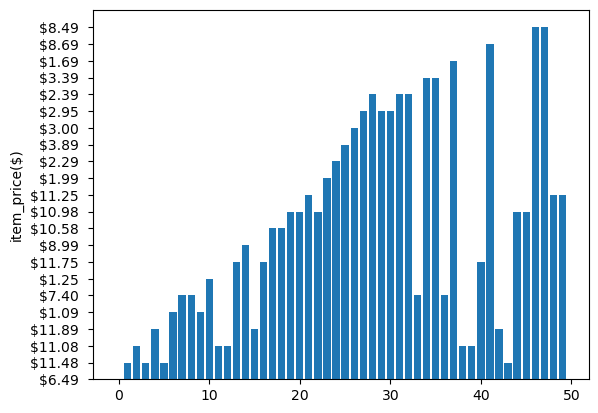

In [54]:
# 아이템 가격 시각화
x_pos = np.arange(len(item_price))

plt.bar(x_pos, item_price["item_price"])
plt.ylabel("item_price($)")
plt.show()

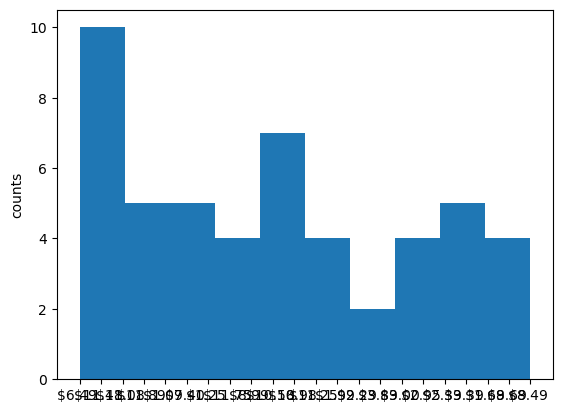

In [55]:
# 아이템 가격 히스토그램
plt.hist(item_price["item_price"])
plt.ylabel("counts")
plt.show()

### 가장 비싼 주문은 총 몇 개의 아이템을 주문했는지 파악

In [57]:
chipo.groupby("order_id").sum(numeric_only = True).sort_values(by = "item_price", ascending = False)[:5]

KeyError: 'item_price'

### Veggie Salad Bowl이 몇 번 주문되었는지 파악

In [61]:
salad_df = chipo[chipo["item_name"] == "Veggie Salad Bowl"]

In [62]:
salad_df.head()

,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",$11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [63]:
salad_df.shape

(18, 5)

In [64]:
# 한 주문 내에서 중복 집계된 데이터를 제외
salad_df = salad_df.drop_duplicates("order_id")
salad_df.head()

,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",$11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [65]:
salad_df.shape

(18, 5)

### Chicken Bowl을 2개 이상 주문한 고객들의 Chicken  Bowl  메뉴에 대한 총 주문 수량 구하기

In [68]:
chicken_df = chipo[chipo["item_name"] == "Chicken Bowl"]

In [69]:
chicken_df.head()

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",$8.49


In [71]:
group_chicken = chicken_df.groupby("order_id")["quantity"].sum()

In [72]:
group_chicken.head()

order_id
2     2
3     1
7     1
10    1
13    1
Name: quantity, dtype: int64

In [74]:
result = group_chicken[group_chicken >= 2]

In [75]:
result.head()

order_id
2      2
34     2
70     2
93     2
124    3
Name: quantity, dtype: int64

In [76]:
result.sum()

260

### 한 주문에 20달러 이상 지불한 손님 수 출력하기

In [77]:
order_groupo = chipo.groupby("order_id")["item_price"].sum()
order_group

,quantity
order_id,
1,4
2,2
3,2
4,2
5,2
...,...
1830,2
1831,3
1832,2


In [78]:
 order_group[order_group.values >= 20]

,quantity
order_id,
926,23
1443,35
1786,20
